In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

# train["datetime"].dt.year # (month / day / hour / minute / second)

print(train.shape)
train.head()

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

## Preprocessing

### Parse datetime

In [5]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()

(10886, 19)


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  datetime-year  \
0        81        0.0       3          13     16           2011   
1        80        0.0       8          32     40           2011   
2        80        0.0       5          27     32           2011   
3        75        0.0       3          10     13           2011   
4        75        0.0       0           1      1           2011   

   datetime-month  datetime-day  datetime-hour  datetime-minute  \
0               1             1              0                0   
1               1             1              1                0   
2               1             1              2                0   
3               1             1              3                0   
4               1             1              4                0   

   datetime-second  datetime-dayofweek  
0                0                   5  
1                0                   5  
2                0                   5  
3                0                   5  
4                0                   5

In [6]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test.head()

(6493, 16)


datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  datetime-year  datetime-month  datetime-day  \
0        56    26.0027           2011               1            20   
1        56     0.0000           2011               1            20   
2        56     0.0000           2011               1            20   
3        56    11.0014           2011               1            20   
4        56    11.0014           2011               1            20   

   datetime-hour  datetime-minute  datetime-second  datetime-dayofweek  
0              0                0                0                   3  
1              1                0                0                   3  
2              2                0                0                   3  
3              3                0                0                   3  
4              4                0                0                   3

## Explore

In [7]:
%matplotlib inline
import seaborn as sns

### datetime

<AxesSubplot:xlabel='datetime-second', ylabel='count'>

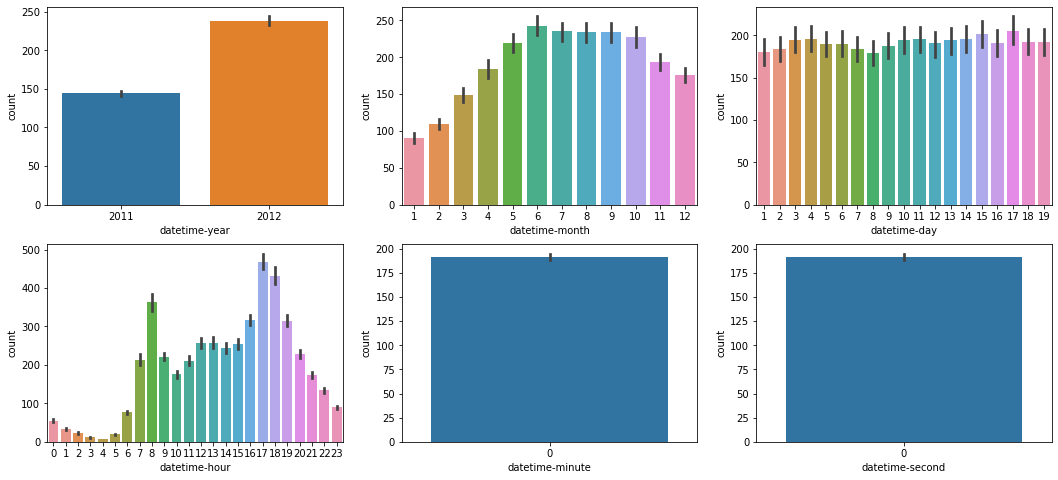

In [8]:
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [9]:
# str == string == 문자열
train["datetime-year_month"] = \
    train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


datetime datetime-year_month
0 2011-01-01 00:00:00              2011-1
1 2011-01-01 01:00:00              2011-1
2 2011-01-01 02:00:00              2011-1
3 2011-01-01 03:00:00              2011-1
4 2011-01-01 04:00:00              2011-1

<AxesSubplot:xlabel='datetime-year_month', ylabel='count'>

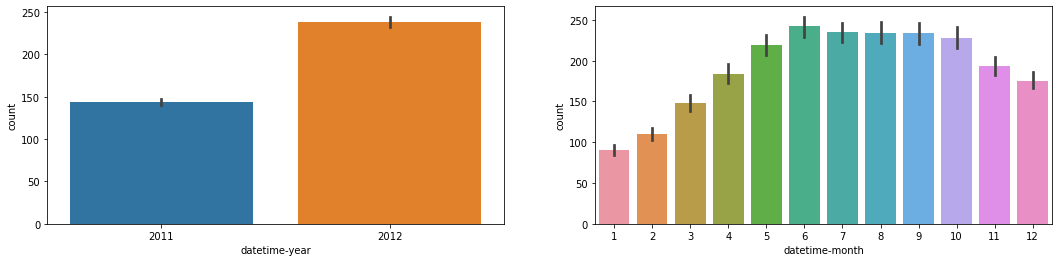

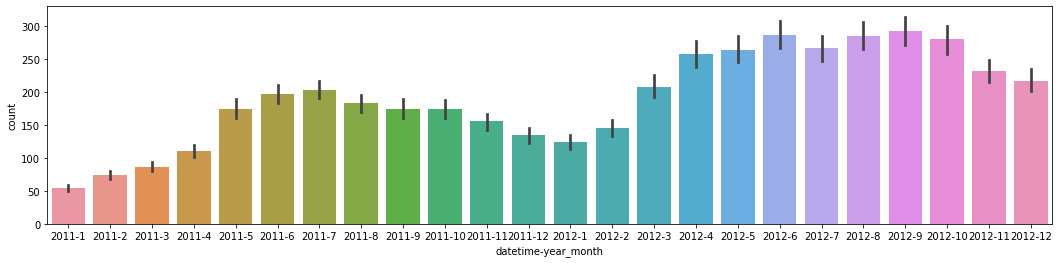

In [10]:
import matplotlib.pyplot as plt

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

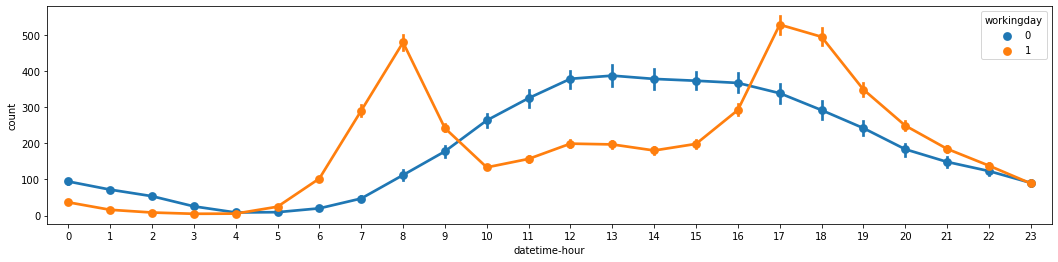

In [11]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

## Train

In [23]:
feature_names = ["workingday", "weather", "atemp", "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['workingday',
 'weather',
 'atemp',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [24]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 6)


workingday  weather   atemp  datetime-year  datetime-hour  \
0           0        1  14.395           2011              0   
1           0        1  13.635           2011              1   
2           0        1  13.635           2011              2   
3           0        1  14.395           2011              3   
4           0        1  14.395           2011              4   

   datetime-dayofweek  
0                   5  
1                   5  
2                   5  
3                   5  
4                   5

In [25]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 6)


workingday  weather   atemp  datetime-year  datetime-hour  \
0           1        1  11.365           2011              0   
1           1        1  13.635           2011              1   
2           1        1  13.635           2011              2   
3           1        1  12.880           2011              3   
4           1        1  12.880           2011              4   

   datetime-dayofweek  
0                   3  
1                   3  
2                   3  
3                   3  
4                   3

In [26]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2, n_estimators=300, max_depth=12)
model

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=2)

### Score

Evaluation Metric = **Root Mean Squared Logarithmic Error** (RMSLE)
$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [28]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [29]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train,
                        cv=10, scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))
# 0.47989 0.47919

Score = 0.47497


In [ ]:
# fit(X_train, y_train) / predict(X_test)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

## Submit

In [ ]:
submit = pd.read_csv("data/sampleSubmission.csv")

print(submit.shape)
submit.head()

In [ ]:
submit["count"] = predictions

print(submit.shape)
submit.head()

In [ ]:
submit.to_csv("submit_002.csv", index=False)